<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Multiple Control Constructions </b></font>
<br>
_prepared by Maksim Dimitrijev and Abuzer Yakaryilmaz_
<br><br>
[<img src="../qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/eoFJdS5BwkA)
<br><br><br>

Remember that when appying CNOT gate, NOT operator is applied to the target qubit if the control qubit is in state $\ket{1}$:

$$ CNOT= \mymatrix{cc|cc}{\blackbit{1} & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1} \\  0 & 0 & \bluebit{1} & 0} . $$

How can we obtain the following operator, in which the NOT operator is applied to the target qubit if the control qubit is in state $ \ket{0} $?

$$ C_0NOT = \mymatrix{cc|cc}{0 & \bluebit{1} & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 \\  0 & 0 & 0 & \blackbit{1}} . $$

As also mentioned in the notebook [Operators on Multiple Bits](../classical-systems/CS40_Operators_on_Multiple_Bits.ipynb), we can apply a $ NOT $ operator on the control bit before applying $ CNOT $ operator so that the $ NOT $ operator is applied to the target qubit when the control qubit has been in state $ \ket{0} $. To recover the previous value of the control qubit, we apply the $ NOT $ operator once more after the $ CNOT $ operator. In short:
<ul>
    <li>apply $ NOT $ operator to the control qubit,</li>
    <li>apply $ CNOT $ operator, and,</li>
    <li>apply $ NOT $ operator to the control qubit.</li>
</ul>

We can implement this idea in Qiskit as follows.

C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


CNOT(0) = 
0.0  1.0  0.0  0.0  
1.0  0.0  0.0  0.0  
0.0  0.0  1.0  0.0  
0.0  0.0  0.0  1.0  


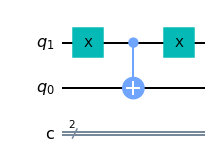

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")

qc = QuantumCircuit(q,c)

qc.x(q[1])

qc.cx(q[1],q[0])

# Returning control qubit to the initial state
qc.x(q[1])

job = execute(qc,Aer.get_backend('unitary_simulator'), shots = 1)
U=job.result().get_unitary(qc,decimals=3).data

print("CNOT(0) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)

qc.draw(output="mpl", reverse_bits=True)

By using this trick, more complex conditional operators can be implemented.

<h3>CCNOT</h3>

Now we introduce $ CCNOT $ gate: **controlled-controlled-not operator** ([Toffoli gate](https://en.wikipedia.org/wiki/Toffoli_gate)), which is controlled by two qubits. The implementation of $CCNOT$ gate in Qiskit is as follows:

    circuit.ccx(control-qubit1,control-qubit2,target-qubit)

That is, $ NOT $ operator is applied to the target qubit when both control qubits are in state $\ket{1}$. Its matrix representation is as follows:

$$ CCNOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} \\ 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0}. $$

<h3>Task 1</h3>

Implement each of the following operators in Qiskit by using three qubits. Verify your implementation by using "unitary_simulator" backend. <br><br>

<font size="-2">
$$
    C_0C_0NOT = \mymatrix{cc|cc|cc|cc}{0 & \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~
    C_0C_1NOT = \mymatrix{cc|cc|cc|cc}{ \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 \\ 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~ \mbox{and} ~~
    C_1C_0NOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 \\ 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}.   
$$
    </font>

0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 



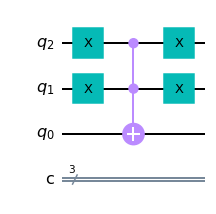

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3,3)
qc.x(2)
qc.x(1)
qc.ccx(2,1,0)
qc.x(2)
qc.x(1)
job=execute(qc, Aer.get_backend('unitary_simulator'), shots=1, optimization_level=0)
current_state=job.result().get_unitary(qc, decimals=3).data
for row in current_state:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)
print()
display(qc.draw(output='mpl',reverse_bits=True))

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 



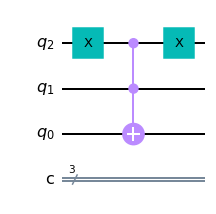

In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3,3)
qc.x(2)
qc.ccx(2,1,0)
qc.x(2)
job=execute(qc, Aer.get_backend('unitary_simulator'), shots=1, optimization_level=0)
current_state=job.result().get_unitary(qc, decimals=3).data
for row in current_state:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)
print()
display(qc.draw(output='mpl',reverse_bits=True))

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 



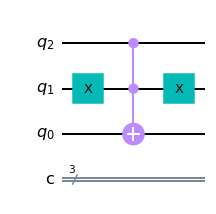

In [5]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3,3)
qc.x(1)
qc.ccx(2,1,0)
qc.x(1)
job=execute(qc, Aer.get_backend('unitary_simulator'), shots=1, optimization_level=0)
current_state=job.result().get_unitary(qc, decimals=3).data
for row in current_state:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)
print()
display(qc.draw(output='mpl',reverse_bits=True))

<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task1">click for our solution</a>

<h3>More controls</h3>

Here we present basic methods on how to implement $ NOT $ gates controlled by more than two qubits by using $CNOT$, $ CCNOT $, and some ancilla (auxiliary) qubits. 

*(Note that Qiskit has a method called "mct" to implement such gates. Another multiple-controlled operator in Qiskit is "mcrz".)*

#### Implementation of CCCNOT gate

We give the implementation of $ CCCNOT $ gate: $NOT$ operator is applied to target qubit when the control qubits are in state $ \ket{111} $. This gate requires 4 qubits. We also use an auxiliary qubit. 

Our qubits are $ q_{aux}, q_3, q_2, q_1, q_0 $, and the auxiliary qubit $q_{aux}$ should be in state $\ket{0}$ after each use. The implementation of the $ CCCNOT $ gate in Qiskit is given below. The short explanations are given as comments.

C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


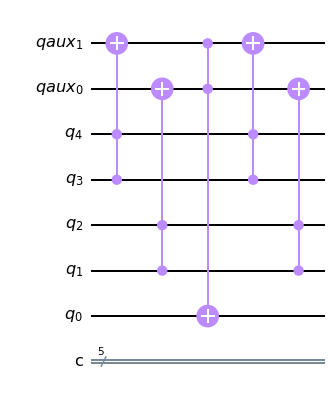

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qaux = QuantumRegister(2,"qaux")
q = QuantumRegister(5,"q")
c = ClassicalRegister(5,"c")

qc = QuantumCircuit(q,qaux,c)

# step 1: set qaux to |1> if both q3 and q2 are in |1>
qc.ccx(q[4],q[3],qaux[1])
qc.ccx(q[2],q[1],qaux[0])

# step 2: apply NOT gate to q0 if both qaux and q1 are in |1>
qc.ccx(qaux[1],qaux[0],q[0])


# step 3: set qaux to |0> if both q3 and q2 are in |1> by reversing the affect of step 1
qc.ccx(q[4],q[3],qaux[1])
qc.ccx(q[2],q[1],qaux[0])

qc.draw(output="mpl",reverse_bits=True)

Now, we execute this circuit on every possible inputs and verify the correctness of the implementation experimentally.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q3 in ['0','1']:
    for q2 in ['0','1']:
        for q1 in ['0','1']:
            for q0 in ['0','1']:
                all_inputs.append(q3+q2+q1+q0)
# print(all_inputs)                                  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(1,"qaux")
    q = QuantumRegister(4,"q")
    c = ClassicalRegister(4,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[3])
    if the_input[1] =='1': qc.x(q[2])
    if the_input[2] =='1': qc.x(q[1])
    if the_input[3] =='1': qc.x(q[0])
    # implement the CCNOT gates
    qc.ccx(q[3],q[2],qaux[0])
    qc.ccx(qaux[0],q[1],q[0])
    qc.ccx(q[3],q[2],qaux[0])
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:3]+" "+the_input[3]+" --> "+the_output[0:3]+" "+the_output[3]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)

input --> output
000 0 --> 000 0
000 1 --> 000 1
001 0 --> 001 0
001 1 --> 001 1
010 0 --> 010 0
010 1 --> 010 1
011 0 --> 011 0
011 1 --> 011 1
100 0 --> 100 0
100 1 --> 100 1
101 0 --> 101 0
101 1 --> 101 1
110 0 --> 110 0
110 1 --> 110 1
111 0 --> 111 1 the output is different than the input
111 1 --> 111 0 the output is different than the input


<h3>Task 2</h3>

Provide an implementation of the NOT operator controlled by 4 qubits ($CCCCNOT$) in Qiskit. Verify its correctness by executing your solution on all possible inputs. (See the above example)

*You may use two auxiliary qubits.*

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q4 in ['0','1']:
    for q3 in ['0','1']:
        for q2 in ['0','1']:
            for q1 in ['0','1']:
                for q0 in ['0','1']:
                    all_inputs.append(q4+q3+q2+q1+q0)
# print(all_inputs)                                  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(2,"qaux")
    q = QuantumRegister(5,"q")
    c = ClassicalRegister(5,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[4])
    if the_input[1] =='1': qc.x(q[3])
    if the_input[2] =='1': qc.x(q[2])
    if the_input[3] =='1': qc.x(q[1])
    if the_input[4] =='1': qc.x(q[0])
    # implement the CCNOT gates
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    qc.ccx(qaux[1],qaux[0],q[0])
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:4]+" "+the_input[4]+" --> "+the_output[0:4]+" "+the_output[4]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)


input --> output
0000 0 --> 0000 0
0000 1 --> 0000 1
0001 0 --> 0001 0
0001 1 --> 0001 1
0010 0 --> 0010 0
0010 1 --> 0010 1
0011 0 --> 0011 0
0011 1 --> 0011 1
0100 0 --> 0100 0
0100 1 --> 0100 1
0101 0 --> 0101 0
0101 1 --> 0101 1
0110 0 --> 0110 0
0110 1 --> 0110 1
0111 0 --> 0111 0
0111 1 --> 0111 1
1000 0 --> 1000 0
1000 1 --> 1000 1
1001 0 --> 1001 0
1001 1 --> 1001 1
1010 0 --> 1010 0
1010 1 --> 1010 1
1011 0 --> 1011 0
1011 1 --> 1011 1
1100 0 --> 1100 0
1100 1 --> 1100 1
1101 0 --> 1101 0
1101 1 --> 1101 1
1110 0 --> 1110 0
1110 1 --> 1110 1
1111 0 --> 1111 1 the output is different than the input
1111 1 --> 1111 0 the output is different than the input


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task2">click for our solution</a>

<h3>Task 3</h3>

Repeat Task 2 for the operator $C_1C_0C_1C_0NOT$: $NOT$ operator is applied to the target qubit if the four control qubits are in state $ \ket{1010} $.

In [57]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q4 in ['0','1']:
    for q3 in ['0','1']:
        for q2 in ['0','1']:
            for q1 in ['0','1']:
                for q0 in ['0','1']:
                    all_inputs.append(q4+q3+q2+q1+q0)
# print(all_inputs)                                  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(2,"qaux")
    q = QuantumRegister(5,"q")
    c = ClassicalRegister(5,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[4])
    if the_input[1] =='1': qc.x(q[3])
    if the_input[2] =='1': qc.x(q[2])
    if the_input[3] =='1': qc.x(q[1])
    if the_input[4] =='1': qc.x(q[0])
    # implement the CCNOT gates
    qc.x(3)
    qc.x(1)
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    qc.ccx(qaux[1],qaux[0],q[0])
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    qc.x(3)
    qc.x(1)
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:4]+" "+the_input[4]+" --> "+the_output[0:4]+" "+the_output[4]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)


input --> output
0000 0 --> 0000 0
0000 1 --> 0000 1
0001 0 --> 0001 0
0001 1 --> 0001 1
0010 0 --> 0010 0
0010 1 --> 0010 1
0011 0 --> 0011 0
0011 1 --> 0011 1
0100 0 --> 0100 0
0100 1 --> 0100 1
0101 0 --> 0101 0
0101 1 --> 0101 1
0110 0 --> 0110 0
0110 1 --> 0110 1
0111 0 --> 0111 0
0111 1 --> 0111 1
1000 0 --> 1000 0
1000 1 --> 1000 1
1001 0 --> 1001 0
1001 1 --> 1001 1
1010 0 --> 1010 1 the output is different than the input
1010 1 --> 1010 0 the output is different than the input
1011 0 --> 1011 0
1011 1 --> 1011 1
1100 0 --> 1100 0
1100 1 --> 1100 1
1101 0 --> 1101 0
1101 1 --> 1101 1
1110 0 --> 1110 0
1110 1 --> 1110 1
1111 0 --> 1111 0
1111 1 --> 1111 1


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task3">click for our solution</a>

<h3>Task 4 (extra)</h3>

Write a function taking a binary string "$ b_1 b_2 b_3 b_4$ that repeats Task 2 for the operator $ C_{b_1}C_{b_2}C_{b_3}C_{b_4}NOT $ gate, where $ b_1,\ldots,b_4$ are bits and $ NOT $ operator is applied to target qubit if the control qubits are in state $ \ket{b_1b_2b_3b_4} $.

In [71]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q4 in ['0','1']: 
    for q3 in ['0','1']:
        for q2 in ['0','1']:
            for q1 in ['0','1']:
                for q0 in ['0','1']:
                    all_inputs.append(q4+q3+q2+q1+q0)
                    
def c4not(control_state):
        print("Control state is",control_state)
        print("input --> output")
        for the_input in all_inputs:
        # create the circuit
            qaux = QuantumRegister(2,"qaux")
            q = QuantumRegister(5,"q")
            c = ClassicalRegister(5,"c")
            qc = QuantumCircuit(q,qaux,c)
        # set the initial value of the circuit w.r.t. the input
            if the_input[0] =='1': qc.x(q[4])
            if the_input[1] =='1': qc.x(q[3])
            if the_input[2] =='1': qc.x(q[2])
            if the_input[3] =='1': qc.x(q[1])
            if the_input[4] =='1': qc.x(q[0])
        # implement the CCNOT gates
            for b in range(4):
                if control_state[b] == '0':
                    qc.x(q[4-b])
            qc.ccx(q[4],q[3],qaux[1])
            qc.ccx(q[2],q[1],qaux[0])
            qc.ccx(qaux[1],qaux[0],q[0])
            qc.ccx(q[4],q[3],qaux[1])
            qc.ccx(q[2],q[1],qaux[0])
            for b in range(4):
                if control_state[b] == '0':
                    qc.x(q[4-b])
        # measure the main quantum register 
            qc.measure(q,c)
        # execute the circuit
            job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
            counts = job.result().get_counts(qc)
            for key in counts: the_output = key
            printed_str = the_input[0:4]+" "+the_input[4]+" --> "+the_output[0:4]+" "+the_output[4]
            if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
            print(printed_str)

In [72]:
# try different values

#c4not()
c4not('1001')
#c4not('0011')
#c4not('1101')
#c4not('0000')



Control state is 1001
input --> output
0000 0 --> 0000 0
0000 1 --> 0000 1
0001 0 --> 0001 0
0001 1 --> 0001 1
0010 0 --> 0010 0
0010 1 --> 0010 1
0011 0 --> 0011 0
0011 1 --> 0011 1
0100 0 --> 0100 0
0100 1 --> 0100 1
0101 0 --> 0101 0
0101 1 --> 0101 1
0110 0 --> 0110 0
0110 1 --> 0110 1
0111 0 --> 0111 0
0111 1 --> 0111 1
1000 0 --> 1000 0
1000 1 --> 1000 1
1001 0 --> 1001 1 the output is different than the input
1001 1 --> 1001 0 the output is different than the input
1010 0 --> 1010 0
1010 1 --> 1010 1
1011 0 --> 1011 0
1011 1 --> 1011 1
1100 0 --> 1100 0
1100 1 --> 1100 1
1101 0 --> 1101 0
1101 1 --> 1101 1
1110 0 --> 1110 0
1110 1 --> 1110 1
1111 0 --> 1111 0
1111 1 --> 1111 1


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task4">click for our solution</a>